# Livre blanc sur l'analyse des données et la BI
## Sarah Bouchikh et Emma Gadea

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline


bidata = pd.read_csv('HR_training.csv', encoding='unicode_escape', engine='python', delimiter=';')

In [2]:
bidata

,id_colab,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,job,salary,left
0,4,"0,72","0,87",5,223,5,0,0,sales,low,1
1,5,"0,37","0,52",2,159,3,0,0,sales,low,1
2,7,"0,1","0,77",6,247,4,0,0,sales,low,1
3,9,"0,89",1,5,224,5,0,0,sales,low,1
4,10,"0,42","0,53",2,142,3,0,0,sales,low,1
...,...,...,...,...,...,...,...,...,...,...,...
10046,14993,"0,4","0,48",2,155,3,0,0,support,low,1
10047,14995,"0,4","0,57",2,151,3,0,0,support,low,1
10048,14996,"0,37","0,48",2,160,3,0,0,support,low,1
10049,14997,"0,37","0,53",2,143,3,0,0,support,low,1


### DEFINITION DES DONNEES DU FICHIER 

- Id : Numéro du collaborateur
- Satisfaction level : Niveau de satisfaction des collaborateurs
- Last evaluation : Niveau de satisfaction des collaborateurs lors de l’évaluation précédente
- Number project : Nombre de projets portés par le collaborateur
- Average monthly hours : Nombre d’heures mensuel moyen d’un collaborateur
- Time spend company : Nombre d’années passées au sein de l’entreprise
- Work accident : Information qui précise si le collaborateur a subi un accident du travail
- Promotion last 5 years : Information qui précise si le collaborateur a été sujet à une promotion durant les 5 dernières années
- Job : Secteur dans lequel travaille le collaborateur
- Salary : Salaire du collaborateur (bas, moyen, haut)
- Left : Si le collaborateur a finalement quitté l’entreprise ou non

# I- Chapitre 1 : Description des données
## A-Typologie des données 

Il existe deux grandes catégories de données :

Les données qualitatives et les données quantitative elle même divisés en sous catégorie en voici la définition :

#### Les données quantitatives

Continues : Les données quantitatives continues sont des données subjectives mesurées sur une échelle continue, comme un degré de satisfaction ou une intensité d'émotion.
 
Discrètes : les données quantitatives discrètes sont à l’inverse non mesurables. Par exemple, ce sont le nombre d'enfants dans une famille, le nombre de produits achetés, le nombre de personnes dans une pièce.


#### Les données qualitatives

Ordinale: Une donnée qualitatives ordinale est une mesure numérique qui permet de classer les observations selon un ordre, mais sans échelle de mesure précise.

Nominale: Une donnée qualitatives nominale est une donnée qui est utilisée pour étiqueter ou catégoriser les observations, sans aucun ordre ou signification numérique.

## B- Catégorie de données

#### Variables à expliquer (dépendantes)

On considère les variables à expliquer comme étant des variables que l'ont peu prédire à l'aide des autres variables. On peut dire qu'elles sont corrélées. Par exemple on peut utiliser la droite de régression linéaire.

#### Variables explicatives (indépendantes)

On considère les variables explicatives comme étant des variables qui sont indépendantes les unes des autres.



##### Voici un tableau résumant la typologie de nos variables, ainsi que leur catégorie :


In [3]:
data = {'Nom des données':['id_colab','satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','work_accident','promotion_last_5years','job','salary','left'],'Typologie des données':['Qualitative nominale','Quantitative continue','Quantitative continue','Quantitative continue','Quantitative continue','Quantitative continue','Qualitative nominale','Qualitative nominale','Qualitative nominale','Qualitative ordinale','Qualitative nominale'], 'Catégorie de données': ['Variable explicative','Variable explicative','Variable explicative','Variable explicative','Variable explicative','Variable explicative','Variable explicative','Variable explicative','Variable explicative','Variable explicative','Variable à expliquer']}
tableau_variables = pd.DataFrame(data)
tableau_variables


,Nom des données,Typologie des données,Catégorie de données
0,id_colab,Qualitative nominale,Variable explicative
1,satisfaction_level,Quantitative continue,Variable explicative
2,last_evaluation,Quantitative continue,Variable explicative
3,number_project,Quantitative continue,Variable explicative
4,average_montly_hours,Quantitative continue,Variable explicative
5,time_spend_company,Quantitative continue,Variable explicative
6,work_accident,Qualitative nominale,Variable explicative
7,promotion_last_5years,Qualitative nominale,Variable explicative
8,job,Qualitative nominale,Variable explicative
9,salary,Qualitative ordinale,Variable explicative


## C-Transformation des données

#### Données qualitatives en données quantitatives  

Nous allons transformer la variable 'left', que nous considérons comme une donnée qualitative continue, en donnée quantitative.

Pour cela, nous avons d'abord dupliqué la colonne 'left', puis nous avons changé les données par : 1='yes' et 0='no'.



In [4]:
bidata = bidata.assign(left_quanti=bidata['left'])
bidata['left_quanti'] = bidata['left_quanti'].map({1 : 'yes', 0 : 'no'})
bidata

,id_colab,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,job,salary,left,left_quanti
0,4,"0,72","0,87",5,223,5,0,0,sales,low,1,yes
1,5,"0,37","0,52",2,159,3,0,0,sales,low,1,yes
2,7,"0,1","0,77",6,247,4,0,0,sales,low,1,yes
3,9,"0,89",1,5,224,5,0,0,sales,low,1,yes
4,10,"0,42","0,53",2,142,3,0,0,sales,low,1,yes
...,...,...,...,...,...,...,...,...,...,...,...,...
10046,14993,"0,4","0,48",2,155,3,0,0,support,low,1,yes
10047,14995,"0,4","0,57",2,151,3,0,0,support,low,1,yes
10048,14996,"0,37","0,48",2,160,3,0,0,support,low,1,yes
10049,14997,"0,37","0,53",2,143,3,0,0,support,low,1,yes


#### Données quantitatives en données qualitatives

Nous allons transformer la variable 'average_montly_hours', que nous considérons comme quantitative nominale, en donnée qualitative.

Pour cela, nous avons d'abord dupliqué la colonne 'average_montly_hours', puis nous avons défini les contraintes relative à la dénomination des différentes données. Nous avons défini 3 catégories : 'low' pour les personnes travaillant moins de 110h/mois,'medium' pour les personnes travaillant entre 110h et 160h/mois et enfin 'high' pour les personnes travaillant plus de 160h/mois.


In [5]:
bidata = bidata.assign(average_montly_hours_quali=bidata['average_montly_hours'])
bins = [0, 110, 160, float('inf')]
labels = ['low', 'medium', 'high']
bidata['average_montly_hours_quali'] = pd.cut(bidata['average_montly_hours'], bins=bins, labels=labels)
bidata

,id_colab,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,job,salary,left,left_quanti,average_montly_hours_quali
0,4,"0,72","0,87",5,223,5,0,0,sales,low,1,yes,high
1,5,"0,37","0,52",2,159,3,0,0,sales,low,1,yes,medium
2,7,"0,1","0,77",6,247,4,0,0,sales,low,1,yes,high
3,9,"0,89",1,5,224,5,0,0,sales,low,1,yes,high
4,10,"0,42","0,53",2,142,3,0,0,sales,low,1,yes,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10046,14993,"0,4","0,48",2,155,3,0,0,support,low,1,yes,medium
10047,14995,"0,4","0,57",2,151,3,0,0,support,low,1,yes,medium
10048,14996,"0,37","0,48",2,160,3,0,0,support,low,1,yes,medium
10049,14997,"0,37","0,53",2,143,3,0,0,support,low,1,yes,medium


In [6]:
bidata.salary.unique().tolist()

['low', 'medium', 'high']

## D-Les mesures de tendances centrale

Il existe 3 mesures de tendance centrale utilisées pour décrire les données d'une distribution statistique : 

#### La médiane 

C’est la valeur qui sépare la moitié inférieure de la moitié supérieure d'un ensemble (deux parties d’effectifs égaux).La médiane est utilisée pour mesurer la tendance centrale d'un ensemble de données. 

#### La moyenne

La moyenne est utilisée pour mesurer la tendance centrale d'un ensemble de données, elle peut également être utilisée pour identifier des tendances ou des changements dans les données au fil du temps en comparant les moyennes de différentes périodes ou groupes.

C'est la somme des données divisée par l’effectif global. C’est l'indicateur le plus simple pour résumer l'information fournie par un ensemble de données.

#### La mode

La mode est une mesure de tendance centrale utilisée pour décrire les données d'une distribution statistique. C'est la valeur qui apparaît le plus fréquemment dans un ensemble de données.Elle est souvent utilisée pour décrire les données qualitatives ou pour identifier les éléments les plus fréquents dans un ensemble de données. 

Afin de rendre notre livrable plus conscis nous avons decidé de ne pas interpréter toutes les variables.

In [7]:
#Mediane
mediane_bidata = bidata.median()
mediane_bidata
##on ne tient pas compte de id_colab et left car insignifiant

/var/folders/f8/nmk0msc11xj6pmj3wt53cglr0000gn/T/ipykernel_96051/3573655911.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mediane_bidata = bidata.median()


id_colab                 7500.0
number_project              4.0
average_montly_hours      199.0
time_spend_company          3.0
work_accident               0.0
promotion_last_5years       0.0
left                        0.0
dtype: float64

##### D'après le résultat, nous obtenons une médiane de 4 pour "number_project" et une médiane de 199 pour "average_montly_hours" . Nous pouvons déduire que 50% des employés intérrogés on été affectés à plus de 4 projets et 50% on été affectés à moins de 4 projets. Nous pouvons également déduire que plus de moitié ont travaillés plus de 199h et l'autre moitié moins de 199h.

In [8]:
#Moyenne
average_bidata = bidata.mean()
average_bidata

##on ne tient pas compte de id_colab et left car insignifiant

/var/folders/f8/nmk0msc11xj6pmj3wt53cglr0000gn/T/ipykernel_96051/3805715750.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  average_bidata = bidata.mean()


id_colab                 7492.237489
number_project              3.803303
average_montly_hours      200.812655
time_spend_company          3.507213
work_accident               0.147050
promotion_last_5years       0.020098
left                        0.237688
dtype: float64

##### D'après le résultat, nous obtenons une moyenne de 3.8 pour "number_project" et une moyenne de 200.8 pour "average_montly_hours". Nous pouvons donc déduire que en moyenne les employés ont environ 4 projets et qu'ils travaillent en moyenne 200h/mois.

In [9]:
#Mode
from scipy import stats

mode_bidata = bidata.mode()
print(mode_bidata.loc[0])
##on ne tient pas compte de id_colab car insignifiant

id_colab                          4
satisfaction_level              0,1
last_evaluation                0,54
number_project                  4.0
average_montly_hours          156.0
time_spend_company              3.0
work_accident                   0.0
promotion_last_5years           0.0
job                           sales
salary                          low
left                            0.0
left_quanti                      no
average_montly_hours_quali     high
Name: 0, dtype: object


##### D'après le resultat, le mode pour number_project est de 4 et 156 pour average_montly_hours. Ce qui signifie que les employés ont tendance à etre affecté à 4 projets et qu'ils ont tendance à travailler 156h/mois.

## E-Les mesures de dispersion et de position 

Les mesures de dispersion décrivent la variabilité ou la répartition des valeurs d'une variable statistique dans un ensemble de données. Les mesures les plus courantes de dispersion sont : 

#### L'écart-type

L'écart-type est une mesure de dispersion des données autour de la moyenne. Plus l'écart-type est faible, plus la population est homogène et à l'inverse plus il est élevé plus elle est hétérogène. Il est particulièrement utile pour identifier les données aberrantes, qui peuvent avoir un impact important sur les résultats globaux. Il est également utilisé dans les calculs statistiques tels que la construction d'intervalles de confiance, le test d'hypothèse et l'analyse de la variance.

#### La variance

La variance mesure la moyenne des distances au carré des valeurs de la variable par rapport à la moyenne de cette variable. Elle est également utilisée dans les calculs statistiques tels que la construction d'intervalles de confiance, le test d'hypothèse et l'analyse de la variance. Elle est utilisée pour mesurer la risque dans l'investissement, pour identifier la volatilité d'un actif financier.

#### La fréquence 

La fréquence désigne le nombre de fois où une valeur ou un événement se produit dans un ensemble de données. Elle peut être exprimée sous forme de nombre absolu ou de pourcentage (c'est-à-dire en rapport à la taille totale de l'ensemble de données).

C'est un outil clé pour l'analyse de données descriptives, qui permet de comprendre la répartition des valeurs dans un ensemble de données.

#### L'étendue (minimum,maximum)

L'étendue statistique est un concept utilisé pour mesurer la variabilité ou la dispersion des données dans un ensemble de données. Elle est généralement utilisée pour décrire la dispersion des données autour de la moyenne et peut être utilisée pour comparer la variabilité entre différents ensembles de données.

#### Le percentile

Un percentile est un concept statistique qui décrit la valeur en dessous de laquelle se trouve un certain pourcentage de valeurs dans un ensemble de données. Par exemple, si un élève a obtenu un score de 75ème percentile sur un test, cela signifie qu'il a obtenu un score supérieur à 75% des autres élèves. Les percentiles peuvent être utilisés pour donner une idée de la distribution des données et pour comparer les performances d'une personne à celles des autres dans un groupe.










In [10]:
#Ecart-type
std_all = bidata.std()
std_all
##on ne tient pas compte de id_colab et left car insignifiant

/var/folders/f8/nmk0msc11xj6pmj3wt53cglr0000gn/T/ipykernel_96051/3234764835.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std_all = bidata.std()


id_colab                 4331.355967
number_project              1.230464
average_montly_hours       49.775706
time_spend_company          1.480360
work_accident               0.354173
promotion_last_5years       0.140341
left                        0.425688
dtype: float64

##### D'après le résultat, l'écart-type de "number_project" est de 1 donc plutôt homègene et est de 49 pour "average_montly_hours" donc plus hétérogène. Nous pouvons donc déduire que les employés sont affectés en générale au même nombre de projet, mais que leurs temps passé au travail est généralement différents pour chacun d'entre eux.

In [11]:
#Variance
var_all = bidata.var()
var_all
##on ne tient pas compte de id_colab et left car insignifiant

/var/folders/f8/nmk0msc11xj6pmj3wt53cglr0000gn/T/ipykernel_96051/3545053567.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  var_all = bidata.var()


id_colab                 1.876064e+07
number_project           1.514043e+00
average_montly_hours     2.477621e+03
time_spend_company       2.191465e+00
work_accident            1.254388e-01
promotion_last_5years    1.969555e-02
left                     1.812103e-01
dtype: float64

##### D'après le resultat, la variance de number_project est de 1.5 c'est à dire que la dispertion est proche de la moyenne alors que la variance deaverage_montly_hours est de 2.4 donc plus écarté de la moyenne. 

In [12]:
# Fréquence
##on ne tient pas compte de id_colab car insignifiant donc nous n'avons pas calculé sa fréquence.
freq_satisfaction_level = bidata['satisfaction_level'].value_counts()
freq_satisfaction_level

0,1     261
0,11    222
0,77    177
0,74    171
0,82    167
       ... 
0,3      22
0,26     22
0,33     21
0,12     20
0,27     19
Name: satisfaction_level, Length: 92, dtype: int64

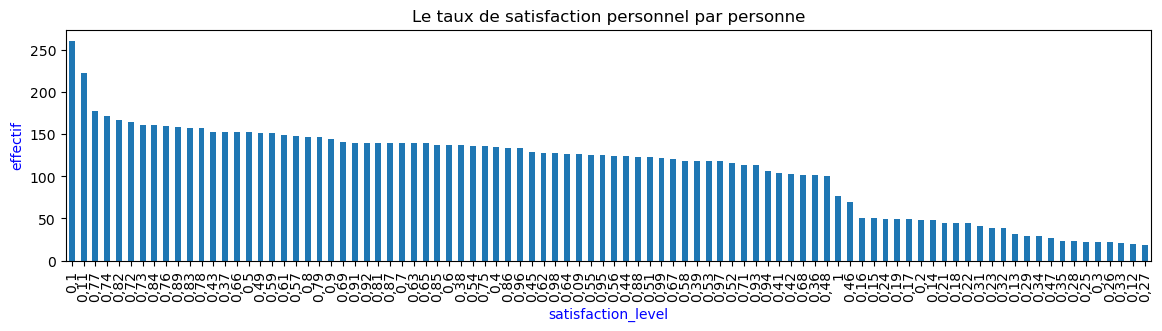

In [13]:
freq_satisfaction_level.plot(kind='bar')
plt.title("Le taux de satisfaction personnel par personne")
plt.xlabel('satisfaction_level', color = 'blue')
plt.ylabel('effectif', color = 'blue')
plt.gcf().set_size_inches(14, 3)
plt.show()

##### D'après le resultat, nous pouvons constater que 261 personnes ont répondu 0.1 de taux de satisfaction.

In [14]:
freq_last_evaluation = bidata['last_evaluation'].value_counts()
freq_last_evaluation

0,54    248
0,55    236
0,5     233
0,51    227
0,53    225
       ... 
0,38     33
0,42     32
0,43     31
0,44     29
0,36     16
Name: last_evaluation, Length: 65, dtype: int64

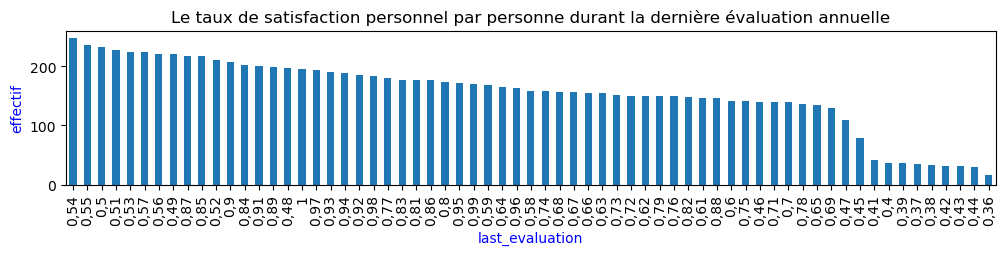

In [15]:
freq_last_evaluation.plot(kind='bar')
plt.title("Le taux de satisfaction personnel par personne durant la dernière évaluation annuelle")
plt.xlabel('last_evaluation', color = 'blue')
plt.ylabel('effectif', color = 'blue')
plt.gcf().set_size_inches(12, 2)

plt.show()

##### D'après le résultat, nous pouvons constater que l'année dernière 248 personnes (effectif le plus élévé) ont répondu 0.54 de taux de satisfaction. Seulement 16 personnes ont répondu 0.36.

In [16]:
freq_number_project = bidata['number_project'].value_counts()
freq_number_project

4    2938
3    2739
5    1830
2    1582
6     790
7     172
Name: number_project, dtype: int64

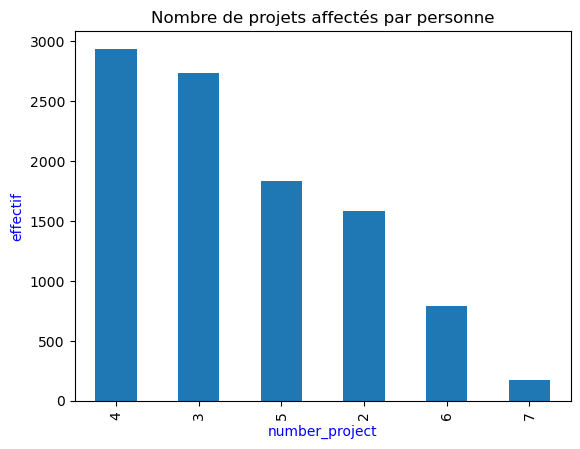

In [17]:
freq_number_project.plot(kind='bar')
plt.title("Nombre de projets affectés par personne")
plt.xlabel('number_project', color = 'blue')
plt.ylabel('effectif', color = 'blue')
plt.show()

##### D'après le resulat, 2938 employés ont été affectés à 4 projets et 172 à 7 projets.

In [18]:
freq_average_montly_hours = bidata['average_montly_hours'].value_counts()
freq_average_montly_hours

156    102
149    101
140     99
151     98
159     93
      ... 
288      5
297      5
96       5
299      4
303      3
Name: average_montly_hours, Length: 215, dtype: int64

In [19]:
freq_average_montly_hours_quali = bidata['average_montly_hours_quali'].value_counts()
freq_average_montly_hours_quali

high      7138
medium    2751
low        162
Name: average_montly_hours_quali, dtype: int64

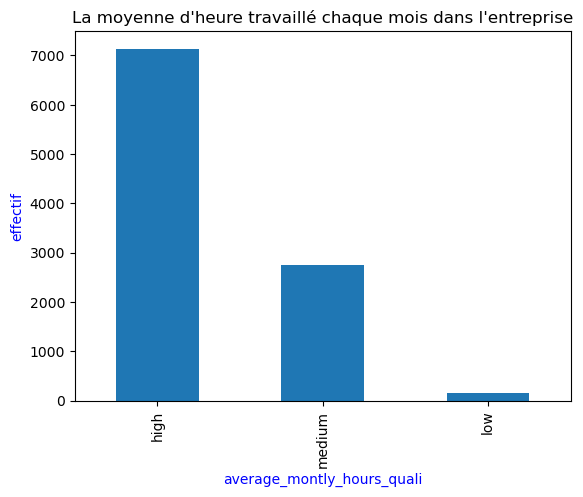

In [20]:
#Les colonnes "average_montly_hours" et "average_montly_hours_quali" étant les même, il est plus simple d'utiliser "average_montly_hours_quali" pour faire le graphique.
#Il y a moins de données, donc le graphique est plus visible et plus compréhensible. Mais ce sont les même données.
freq_average_montly_hours_quali.plot(kind='bar')
plt.title("La moyenne d'heure travaillé chaque mois dans l'entreprise")
plt.xlabel('average_montly_hours_quali', color = 'blue')
plt.ylabel('effectif', color = 'blue')
plt.show()

##### D'après le résultat, 7238 employés ont travaillés en moyenne plus de 160h/mois et seulement 162 ont travaillés moins de 110h/mois

In [21]:
freq_time_spend_company = bidata['time_spend_company'].value_counts()
freq_time_spend_company

3     4311
2     2174
4     1713
5      976
6      483
10     155
7      122
8      117
Name: time_spend_company, dtype: int64

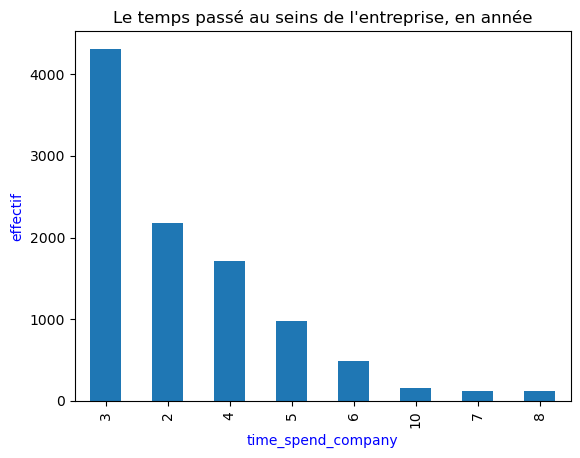

In [22]:
freq_time_spend_company.plot(kind='bar')
plt.title("Le temps passé au seins de l'entreprise, en année")
plt.xlabel('time_spend_company', color = 'blue')
plt.ylabel('effectif', color = 'blue')
plt.show()

##### D'après le resultat, 4311 employés sont là depuis 3 ans. Pour la minorité d'entre eux soit 117 employés, depuis 8 ans.

In [23]:
freq_work_accident = bidata['work_accident'].value_counts()
freq_work_accident

0    8573
1    1478
Name: work_accident, dtype: int64

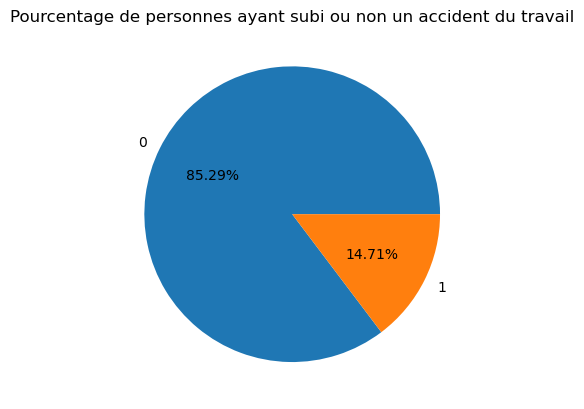

In [24]:
freq_work_accident.plot(kind='pie', autopct='%1.2f%%')
plt.title('Pourcentage de personnes ayant subi ou non un accident du travail')
plt.ylabel('')
plt.show()

##### D'après le résultat, 8573 ou 85% des employés n'ont pas subi d'accident de travail et 1478 ou 14% ont subi un accident du travail.

In [25]:
freq_promotion_last_5years = bidata['promotion_last_5years'].value_counts()
freq_promotion_last_5years

0    9849
1     202
Name: promotion_last_5years, dtype: int64

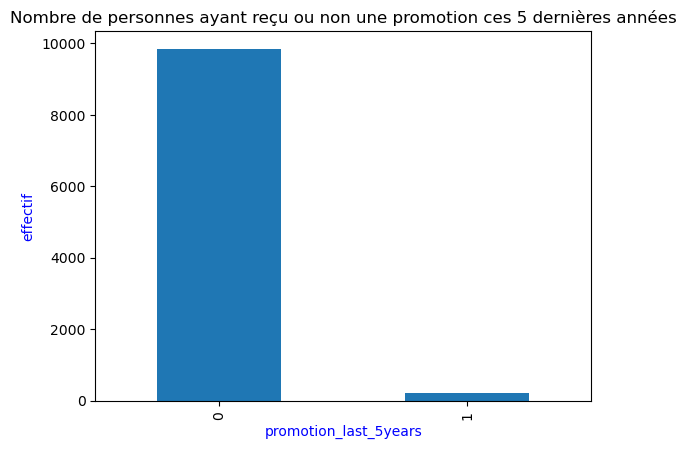

In [26]:
freq_promotion_last_5years.plot(kind='bar')
plt.title('Nombre de personnes ayant reçu ou non une promotion ces 5 dernières années')
plt.xlabel('promotion_last_5years', color = 'blue')
plt.ylabel('effectif', color = 'blue')
plt.show()

##### D'après le résultat, seulement 202 employés ont eu une promotion lors de ces 5 dernières années.

In [27]:
freq_job = bidata['job'].value_counts()
freq_job

sales          2816
technical      1808
support        1468
IT              852
product_mng     586
marketing       583
RandD           509
accounting      502
hr              494
management      433
Name: job, dtype: int64

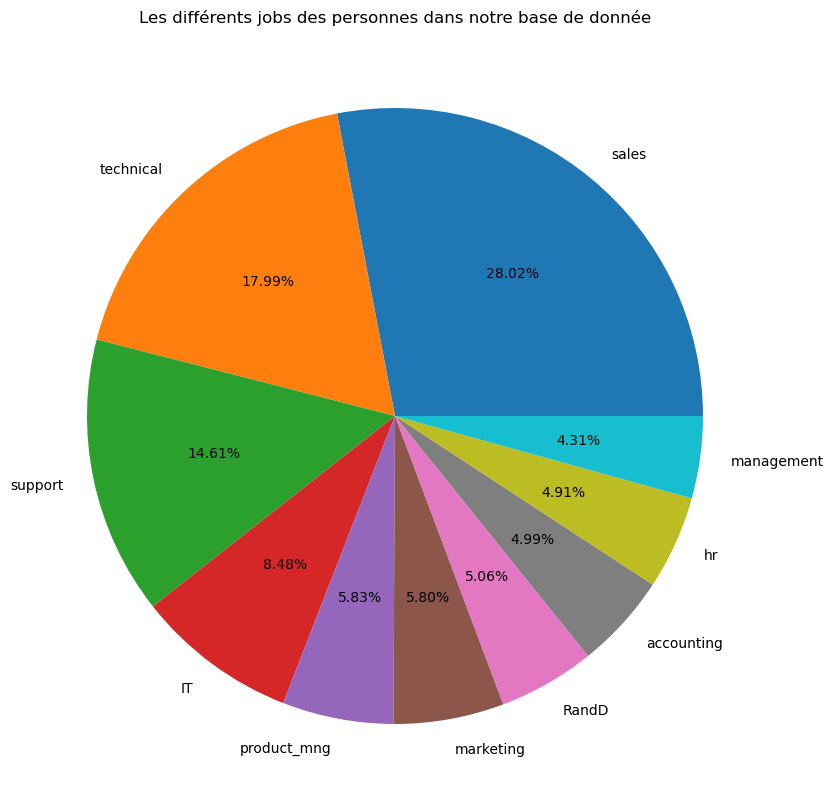

In [28]:
freq_job.plot(kind='pie', autopct='%1.2f%%')
plt.title('Les différents jobs des personnes dans notre base de donnée')
plt.ylabel('')
plt.gcf().set_size_inches(10, 10)

plt.show()

##### D'après le résultat, 2816 employés soit 28% ont un poste en vente, et seulement 433 soit 4.3% ont un poste dans le domaine du management.

In [29]:
freq_salary = bidata['salary'].value_counts()
freq_salary

low       4899
medium    4324
high       828
Name: salary, dtype: int64

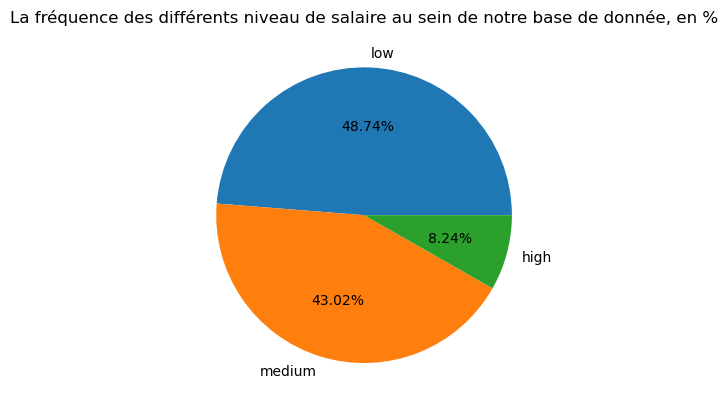

In [30]:
freq_salary.plot(kind='pie', autopct='%1.2f%%')
plt.title('La fréquence des différents niveau de salaire au sein de notre base de donnée, en %')
plt.ylabel('')
plt.show()

##### D'après le résultat, 4899 soit 48.7% des employés ont un salaire faible et 828 soit 8.2% ont un salaire élevé.

In [31]:
freq_left = bidata['left'].value_counts()
freq_left
#Les colonnes "left_quanti" et "left" ont les même données. La fréquence sera donc la même. Yes=1 et No=0.

0    7662
1    2389
Name: left, dtype: int64

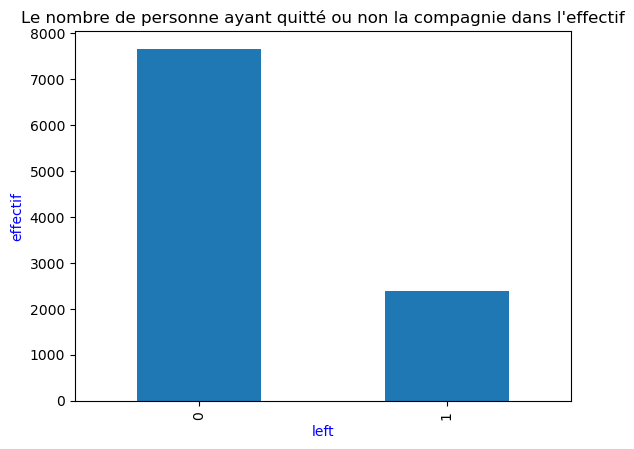

In [32]:
freq_left.plot(kind='bar')
plt.title("Le nombre de personne ayant quitté ou non la compagnie dans l'effectif")
plt.xlabel('left', color = 'blue')
plt.ylabel('effectif', color = 'blue')
plt.show()

##### D'après le résultat, 7662 employés sont restés dans l'entreprise et 2389 sont partis.

In [33]:
#Etendue min
#id_colab,job,salary,left_quanti,average_montly_hours_quali sont insignifiant.
min_all = bidata.min()
min_all

id_colab                         4
satisfaction_level            0,09
last_evaluation               0,36
number_project                   2
average_montly_hours            96
time_spend_company               2
work_accident                    0
promotion_last_5years            0
job                             IT
salary                        high
left                             0
left_quanti                     no
average_montly_hours_quali     low
dtype: object

##### D'après le résultat, le minimum de projets affecté est de 2 et le minimum d'heures effectués par mois est de 96h.

In [34]:
#Etendue max
#id_colab,job,salary,left_quanti,average_montly_hours_quali sont insignifiant.
max_all = bidata.max()
max_all

id_colab                          14998
satisfaction_level                    1
last_evaluation                       1
number_project                        7
average_montly_hours                310
time_spend_company                   10
work_accident                         1
promotion_last_5years                 1
job                           technical
salary                           medium
left                                  1
left_quanti                         yes
average_montly_hours_quali         high
dtype: object

##### D'après le résultat, le nombre maximum projets affecté est de 7 et le maximum d'heures effectués par mois est de 310h.

In [35]:
#Percentile
#id_colab est insignifiant
percentiles_all = bidata.quantile([0.25, 0.5, 0.75])
percentiles_all

,id_colab,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,left
0.25,3750.5,3.0,156.0,3.0,0.0,0.0,0.0
0.50,7500.0,4.0,199.0,3.0,0.0,0.0,0.0
0.75,11249.0,5.0,245.0,4.0,0.0,0.0,0.0


##### D'après le résultat, 25% des employés ont été affectés à 3 projets et 75% à 5 projets. Concernant les heures effectués par mois 25% des employés travaillent 156h/mois et 75% travaillent 245h/mois.

##### Voici un tableau regroupant l'ensemble des KPIs ci dessus:

In [36]:
kpi = bidata.describe().applymap('{:.2f}'.format)
kpi
#On ne tient pas compte de id_colab et left car insignifiant.

,id_colab,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,left
count,10051.00,10051.00,10051.00,10051.00,10051.00,10051.00,10051.00
mean,7492.24,3.80,200.81,3.51,0.15,0.02,0.24
std,4331.36,1.23,49.78,1.48,0.35,0.14,0.43
min,4.00,2.00,96.00,2.00,0.00,0.00,0.00
25%,3750.50,3.00,156.00,3.00,0.00,0.00,0.00
50%,7500.00,4.00,199.00,3.00,0.00,0.00,0.00
75%,11249.00,5.00,245.00,4.00,0.00,0.00,0.00
max,14998.00,7.00,310.00,10.00,1.00,1.00,1.00


# Représentation graphique de la distribution des données

In [37]:
#Rappelons ici à quoi notre dataframe "bidata" ressemble en affichant seulement les 5premières lignes.
bidata.head()

,id_colab,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,job,salary,left,left_quanti,average_montly_hours_quali
0,4,"0,72","0,87",5,223,5,0,0,sales,low,1,yes,high
1,5,"0,37","0,52",2,159,3,0,0,sales,low,1,yes,medium
2,7,"0,1","0,77",6,247,4,0,0,sales,low,1,yes,high
3,9,"0,89",1,5,224,5,0,0,sales,low,1,yes,high
4,10,"0,42","0,53",2,142,3,0,0,sales,low,1,yes,medium


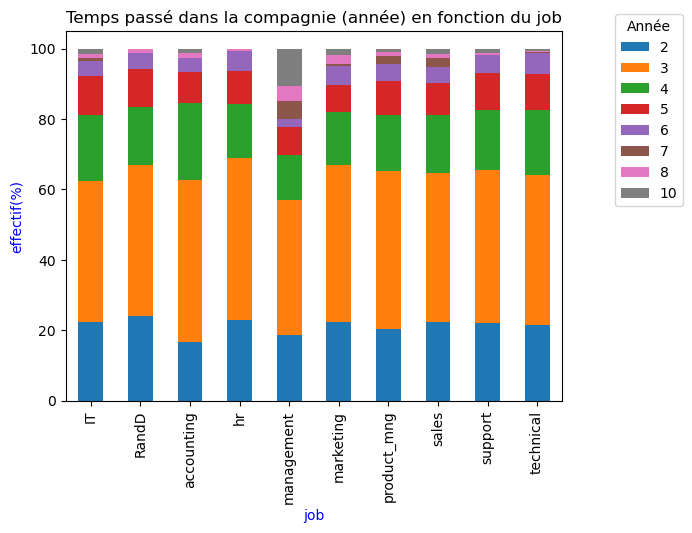

In [38]:
bidata.groupby(['job','time_spend_company']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True, legend=True)
plt.title('Temps passé dans la compagnie (année) en fonction du job')
plt.legend(bbox_to_anchor=(1.1,0.5), loc="lower right", 
                          bbox_transform=plt.gcf().transFigure, title = 'Année')
plt.xlabel('job', color = 'blue')
plt.ylabel('effectif(%)', color = 'blue')
plt.show()

##### Prenons l'exemple du marketing, nous pouvons constater que les employés du service marketing restent en moyenne 3 ans.

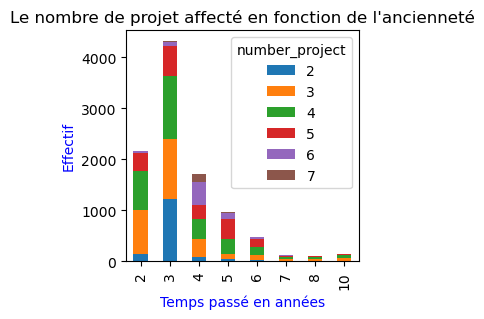

In [39]:
bidata.groupby(['time_spend_company','number_project']).size().unstack().plot(kind='bar',stacked=True)
plt.title("Le nombre de projet affecté en fonction de l'ancienneté")
plt.xlabel('Temps passé en années', color = 'blue')
plt.ylabel('Effectif', color = 'blue')
plt.gcf().set_size_inches(3, 3)
plt.show()

##### Prenons l'exemple des employés ayant une ancienneté de 3 ans, nous pouvons constater que la minorité ont été affectés 6 projet. Aucun d'entres eux ont 7 projets.

##### Ces graphiques sont un avant goût du prochain chapitre dans lequel nous allons explorer les données grâce à des analyses multivariés.

# II- Chapitre 2 : Explorer les données

Dans ce chapitre nous allons comparer les variables entre elles afin de pouvoir interpreter des résultats. Cela vas nous permettre de mieux comprendre nos données et de comprendre ce qui pousse les employés à quitter l'entreprise.

### A-Comparer des variables
#### Comparaison de nos variables numériques

Voici un tableau de corrélation de nos variables numérique.Le tableau de corrélation est un outil statistique qui montre la force et la direction de la relation entre deux ou plusieurs variables quantitatives. Il peut être utilisé pour identifier les variables qui sont fortement corrélées et qui peuvent influencer les résultats d'une analyse.

In [48]:
bidata_numericvalues = bidata[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','work_accident','promotion_last_5years']]
corr_matrix = bidata_numericvalues.corr(method='spearman')
corr_matrix

,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years
number_project,1.000000,0.400247,0.250878,0.005150,-0.000919
average_montly_hours,0.400247,1.000000,0.168228,-0.013169,-0.008891
time_spend_company,0.250878,0.168228,1.000000,-0.022982,0.033373
work_accident,0.005150,-0.013169,-0.022982,1.000000,0.032622
promotion_last_5years,-0.000919,-0.008891,0.033373,0.032622,1.000000


#### Comparaison de nos variables qualitatives et test Chi2
Afin de pouvoir comparer nos variables qualitatives nous allons utiliser la méthode du Chi2. En effet, cette méthode permet d'évaluer si une différence observée entre les fréquences observées et les fréquences théoriques est statistiquement significative.Le test du chi2 est souvent utilisé dans les sciences sociales et la médecine pour déterminer si une association statistique existe entre deux variables catégoriques, telles que le sexe et une maladie, ou l'âge et un comportement de consommation.


#### Comparaison de nos variables quantitatives et qualitatives avec la méthode ANOVA

Afin de comparer des variables quantitatives et qualitatives entres elles nous allons utiliser la méthode ANOVA.Cette méthode sert à évaluer l'effet d'une ou plusieurs variables explicatives sur une variable réponse. Elle permet de déterminer si les différences observées dans la variable réponse peuvent être attribuées à des différences dans les valeurs des variables explicatives ou sont le résultat d'une variation aléatoire. Cette méthode est souvent utilisée en analyse statistique pour des expériences scientifiques, en marketing pour des tests d'hypothèses sur les produits ou les segments de marché, et en économie pour des études de marché.
